In [1]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Cropping2D,Reshape
from keras.models import Sequential, load_model
from keras.layers.core import Activation
from keras.models import Model
from keras import backend as K
from keras.utils import np_utils


import numpy as np

import matplotlib.pyplot as plt

from keras import regularizers

from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape( -1, 28,28,1)
x_test = x_test.reshape( -1, 28,28,1)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print(x_train.shape, x_test.shape, y_train_hot.shape, y_test_hot.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [4]:
from sklearn.model_selection import train_test_split
tr_x,cv_x,tr_y,cv_y=train_test_split(x_train,y_train_hot, test_size =0.4,random_state=30 );
tr_xx,cv_xx,tr_yx,cv_yx=train_test_split(tr_x,tr_y, test_size =0.4,random_state=30 );
tr_xxx,cv_xxx,tr_yxx,cv_yxx=train_test_split(tr_xx,tr_yx, test_size =0.4,random_state=30 );
tr_xxx1,cv_xxx1,tr_yxx1,cv_yxx1=train_test_split(tr_xxx,tr_yxx, test_size =0.4,random_state=30 );
tr_xxx2,cv_xxx2,tr_yxx2,cv_yxx2=train_test_split(tr_xxx1,tr_yxx1, test_size =0.2,random_state=30 );

In [5]:
# Add noise to original images
noise_factor = 0.5
x_train_noisy = tr_xxx2 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=tr_xxx2.shape) 
x_test_noisy = cv_xxx2+ noise_factor * np.random.normal(loc=0.0, scale=1.0, size=cv_xxx2.shape) 

# Clip the images to maximum value of 1 and minimum value to 0 since we will be using binary cross entropy loss
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

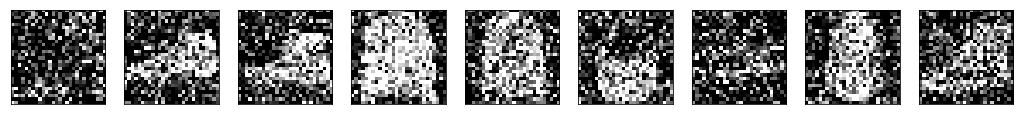

In [6]:
# Plot 9 noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
# Input placeholder
input_img = Input(shape=(28, 28, 1))

# Encoder architecture
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder architecture
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# create autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
__________

In [8]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train the model
autoencoder.fit(x_train_noisy,tr_xxx2,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, cv_xxx2))

Train on 6220 samples, validate on 1556 samples
Epoch 1/50
6220/6220 [==============================] - 387s 62ms/step - loss: 0.5667 - val_loss: 0.5027
Epoch 2/50
6220/6220 [==============================] - 387s 62ms/step - loss: 0.4758 - val_loss: 0.4178
Epoch 3/50
6220/6220 [==============================] - 387s 62ms/step - loss: 0.4047 - val_loss: 0.3812
Epoch 4/50
6220/6220 [==============================] - 386s 62ms/step - loss: 0.3710 - val_loss: 0.3630
Epoch 5/50
6220/6220 [==============================] - 387s 62ms/step - loss: 0.3546 - val_loss: 0.3507
Epoch 6/50
6220/6220 [==============================] - 388s 62ms/step - loss: 0.3435 - val_loss: 0.3423
Epoch 7/50
6220/6220 [==============================] - 387s 62ms/step - loss: 0.3373 - val_loss: 0.3360
Epoch 8/50
6220/6220 [==============================] - 390s 63ms/step - loss: 0.3320 - val_loss: 0.3326
Epoch 9/50
6220/6220 [==============================] - 388s 62ms/step - loss: 0.3288 - val_loss: 0.3313
Epoch 1

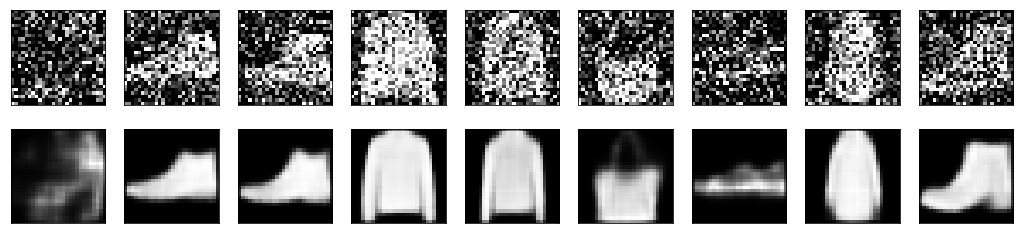

In [9]:
# decoded_imgs - decoded representation of test image
decoded_imgs = autoencoder.predict(cv_xxx2)

n = 11  # Display 9 images
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# decoded_imgs - decoded representation of test image

x_test_noisy = x_test+ noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

decoded_imgs = autoencoder.predict(x_test)

n = 11  # Display 9 images
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

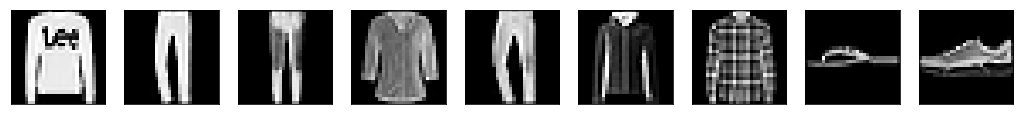

In [11]:
n = 11
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
n1 = [1025, 2090,1780,2500,1000,150,9078,2000,4589,8556]
plt.figure(figsize=(20, 4))
for i in n1:
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: num must be 1 <= num <= 22, not 1026

<Figure size 1440x288 with 0 Axes>

In [ ]:

n = 11  # Display 9 images
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()